### df저장

In [1]:
# from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ais = pd.read_csv('aisles.csv')
df_dep = pd.read_csv('departments.csv')
df_ord_prod = pd.read_csv('order_products__prior.csv')
df_ord_tr = pd.read_csv('order_products__train.csv')
df_ords = pd.read_csv('orders.csv')
df_prod = pd.read_csv('products.csv')


In [3]:
print("aisles.csv Missing values : ",df_ais.isnull().values.sum())
print("departments.csv Missing values : ",df_dep.isnull().values.sum())
print("order_products__prior.csv Missing values : ",df_ord_prod.isnull().values.sum())
print("order_products__train.csv Missing values : ",df_ord_tr.isnull().values.sum())
print("orders.csv Missing values : ",df_ords.isnull().values.sum())
print("products.csv Missing values : ",df_prod.isnull().values.sum())

aisles.csv Missing values :  0
departments.csv Missing values :  0
order_products__prior.csv Missing values :  0
order_products__train.csv Missing values :  0
orders.csv Missing values :  206209
products.csv Missing values :  0


### aisles.csv EDA

In [4]:
df_ais.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [5]:
df_ais.duplicated().sum()

0

In [6]:
df_ais.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
df_ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


aisle - 상품의 소분류 정도로 기억해야겠다

aisle이 있는 데이터 프레임 -> df_prod

In [8]:
print("소분류 ID :",df_ais.aisle_id.nunique(),"개")
print("소분류 종류 :",df_ais.aisle.nunique(),"개")

소분류 ID : 134 개
소분류 종류 : 134 개


### departments.csv EDA

In [9]:
df_dep.tail()


,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [10]:
df_dep.isnull().sum()

department_id    0
department       0
dtype: int64

In [11]:
df_dep.duplicated().sum()

0

In [12]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
print("대분류 ID :",df_dep.department_id.nunique(),"개")
print("대분류 종류 :",df_dep.department.nunique(),"개")

대분류 ID : 21 개
대분류 종류 : 21 개


### order_products__prior.csv EDA

In [14]:
df_ord_prod.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
df_ord_prod.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [16]:
df_ord_prod.duplicated().sum()

0

In [17]:
df_ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [18]:
print("주문 정보 :",df_ord_prod.order_id.nunique(),"개")
print("상품 갯수 :",df_ord_prod.product_id.nunique(),"개")
print("카트 추가 순서 :",df_ord_prod.add_to_cart_order.nunique(),"가지")
print("재주문 상품 :",df_ord_prod.reordered.nunique(),"가지")

주문 정보 : 3214874 개
상품 갯수 : 49677 개
카트 추가 순서 : 145 가지
재주문 상품 : 2 가지


In [19]:
# for x in df_ord_prod.columns:
#     print(x,"갯수 :",df_ord_prod[x].nunique())

### order_products__train.csv EDA

In [20]:
df_ord_tr.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
df_ord_tr.duplicated().sum()

0

In [22]:
df_ord_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### orders.csv EDA

In [23]:
df_ords.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [24]:
df_ords.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [25]:
df_ords.duplicated().sum()

0

In [26]:
# df_ords = df_ords.dropna()
# df_ords = df_ords.reset_index()


In [27]:
df_ords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [28]:
df_ords.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [29]:
df_ords.shape

(3421083, 7)

In [30]:
print("유저 수 :",df_ords.user_id.nunique(),"명")
print("eval set :",df_ords.eval_set.nunique(),"개")
print("유저 누적 주문 수 :",df_ords.order_number.nunique(),"가지")
print("주문 요일 :",df_ords.order_dow.nunique(),"가지")
print("주문 시간 :",df_ords.order_hour_of_day.nunique(),"가지")
print("주문 텀 :",df_ords.days_since_prior_order.nunique(),"가지")

유저 수 : 206209 명
eval set : 3 개
유저 누적 주문 수 : 100 가지
주문 요일 : 7 가지
주문 시간 : 24 가지
주문 텀 : 31 가지


### products.csv EDA

In [31]:
df_prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [32]:
df_prod.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [33]:
df_prod.duplicated().sum()

0

In [34]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [35]:
print("제품 ID :",df_prod.product_id.nunique(),"개")
print("제품명 :",df_prod.product_name.nunique(),"가지")

제품 ID : 49688 개
제품명 : 49688 가지


### 뭘 도출할수 있는가

orders.csv 데이터에서 
1. order number로 얼마나 자주 이용하는지
2. order dow로 무슨 요일에 사람들이 자주 사용하는지
3. order_hour로 어느 시간대에 사람들이 가장 많이 사용하는지
4. order dow와 hour로 요일별 어느 시간대에 사람들이 가장 많이 사용하는지
5. 재주문까지 얼마나 걸리는가
6. 주문수가 가장 많은건 무엇인가

사실상 배민같은 회사, 코로나 덕분에 성장했다

국내 트렌드 리포트를 적용할수 있을진 모르겠다
1. 어떤 품목들을 자주 구매하는가
2. 주문할때 주문 비율이 높은 품목은 무엇인가
3. 고객별 주문수(위의 1번과 동일)
4. 묶음 판매? 뭐랑 같이 잘 팔릴까(근데 한번에 한개씩만 주문이 넣어져서 확인 할수가없다)
5. 재주문율 높은 식품종류들

인스타카트는 빠른 배달 서비스에 중점을 두고있다
한국의 쿠팡, 마켓컬리, 이마트몰과 비슷한 인스타카트
1. -> 자주 구매 하는 품목에 할인하는 것이 사람들을 더 끌어 모을까
2. -> 

In [36]:
df_ords[df_ords.order_id == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [52]:
df_ords.user_id.value_counts()

152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: user_id, Length: 206209, dtype: int64

In [54]:
df_ords.user_id.value_counts().describe() 
# 평균적으로 16번의 주문
# 최소 4번씩은 주문
# 

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: user_id, dtype: float64

Text(0.5, 0, 'Number of Orders')

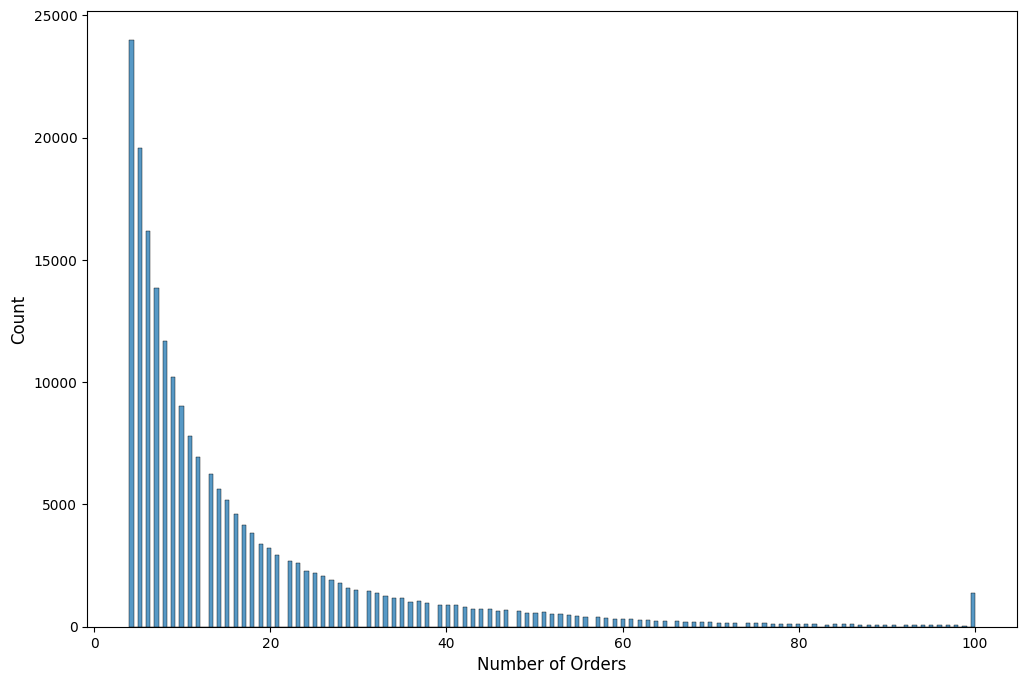

In [57]:
plt.figure(figsize=(12,8))
sns.histplot(df_ords.user_id.value_counts())
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)

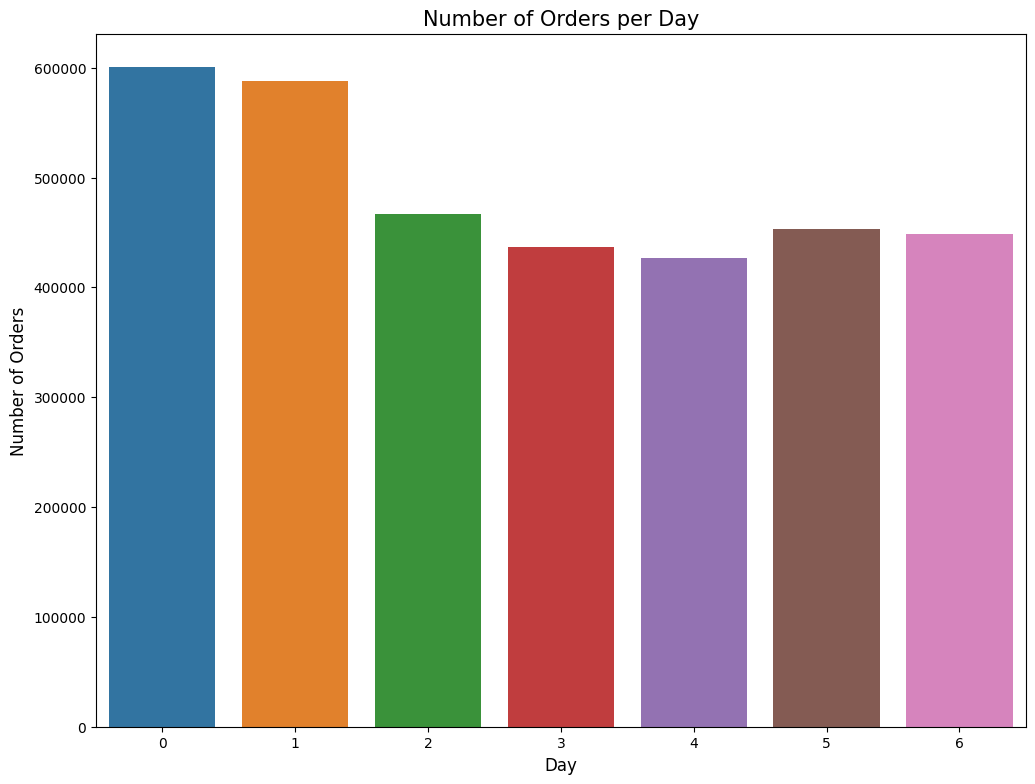

In [56]:
plt.figure(figsize=(12,9))
sns.countplot(x = 'order_dow' ,data = df_ords)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.title('Number of Orders per Day', fontsize=15);

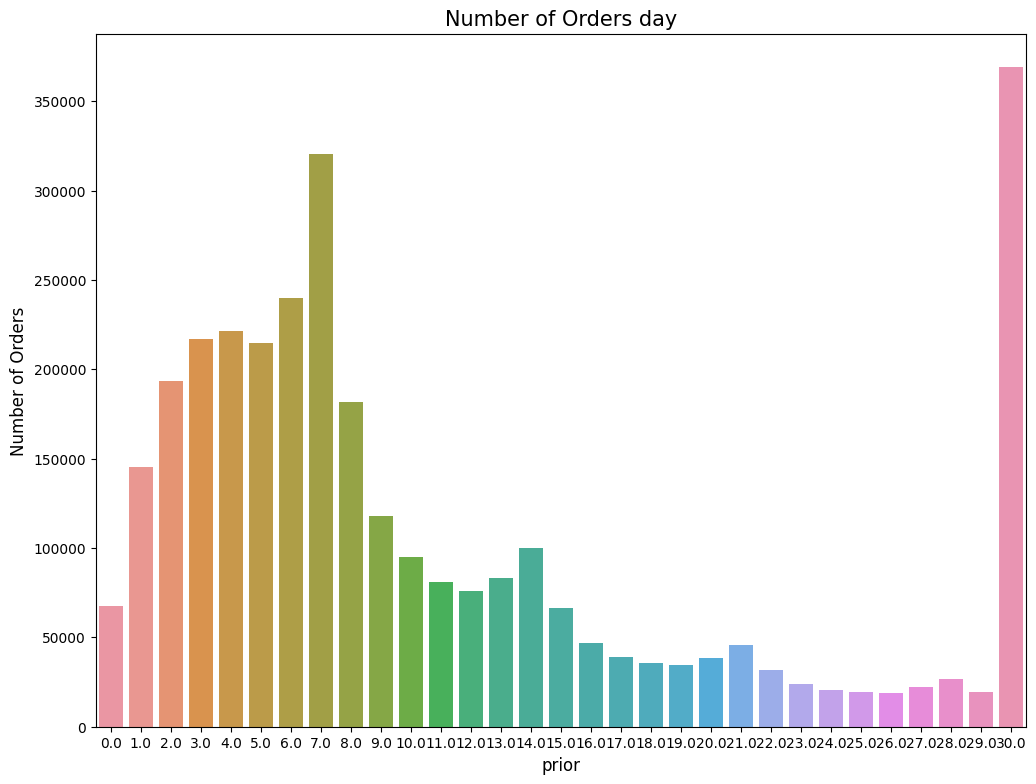

In [59]:
plt.figure(figsize=(12,9))
sns.countplot(x = 'days_since_prior_order' ,data = df_ords)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('prior', fontsize=12)
plt.title('Number of Orders day', fontsize=15);

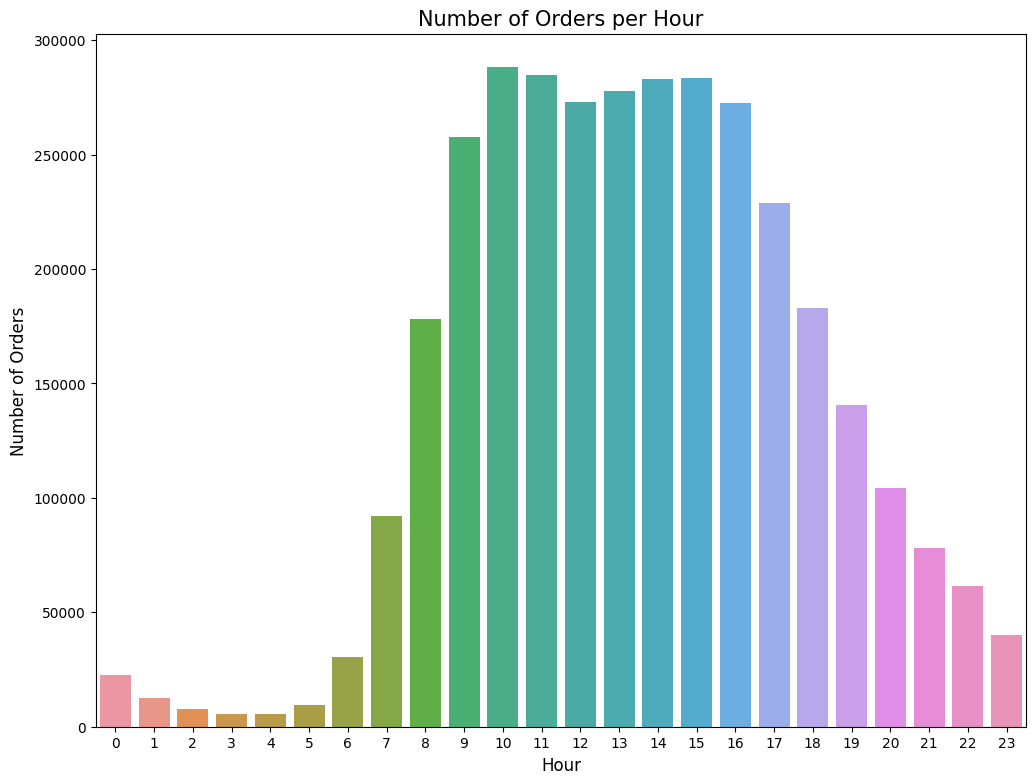

In [68]:
plt.figure(figsize=(12,9))
sns.countplot(x = 'order_hour_of_day' ,data = df_ords)
# sns.countplot(x = 'order_hour_of_day' ,data = df_ords[df_ords.order_dow==6])
# 요일 별로 시간대에 별 차이는 보이지 않았다.
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.title('Number of Orders per Hour', fontsize=15);

In [76]:
df_ords.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


<AxesSubplot: xlabel='order_hour_of_day', ylabel='order_dow'>

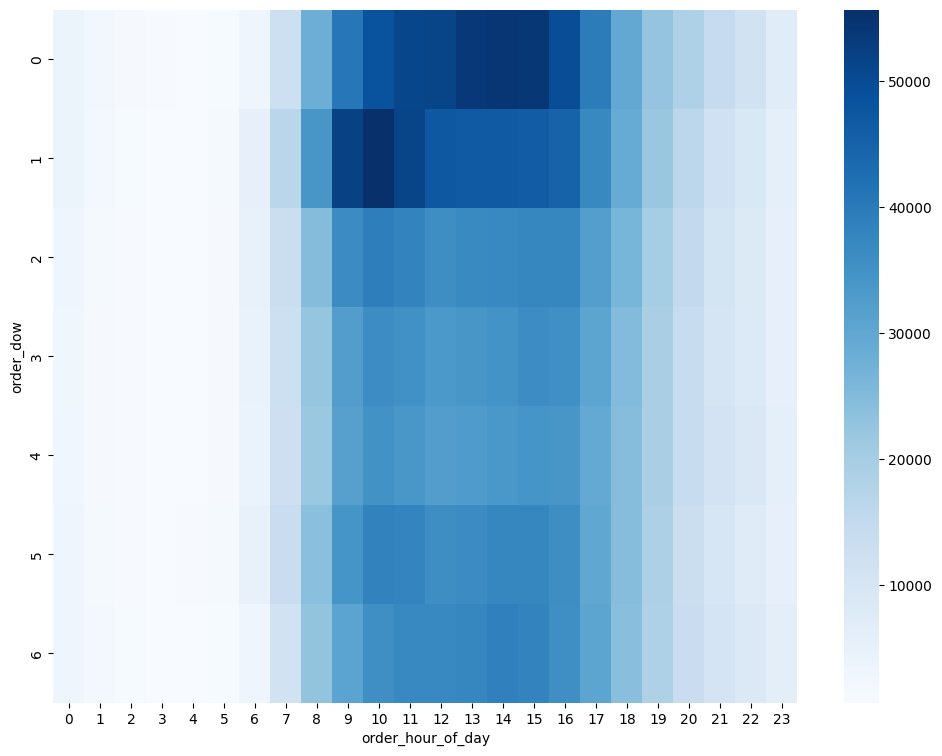

In [90]:
grouped_df = df_ords.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,9))

sns.heatmap(grouped_df,cmap='Blues')

In [38]:
df_ord_tr.product_id.value_counts()

24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
42744        1
5871         1
47237        1
9305         1
38900        1
Name: product_id, Length: 39123, dtype: int64

In [69]:
df_prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [73]:
print(df_ord_tr.shape)
df_ord_tr.head(15)


(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [72]:
df_ords.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [93]:
merge_df = pd.merge(df_ord_prod, df_prod, on = 'product_id', how = 'left')
merge_df = pd.merge(merge_df, df_ais, on = 'aisle_id', how = 'left')
merge_df = pd.merge(merge_df, df_dep, on = 'department_id', how = 'left')


In [94]:
merge_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
